# Titanic Survived Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
print('library imported succesfully')

library imported succesfully


In [2]:
path = r'C:\Users\Huligesh\Desktop\Abeyaantrix Internship\Dataset'
file = r'\train.csv'
df = pd.read_csv(path + file)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This Dataset is about predicting survival and death among 
people in different classes of the ship

# Data exploration

In [4]:
#number of rows and columns
df.shape

(891, 12)

In [5]:
#getting some information about the datatime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# DATA VISUALIZATION

<Axes: xlabel='Survived', ylabel='count'>

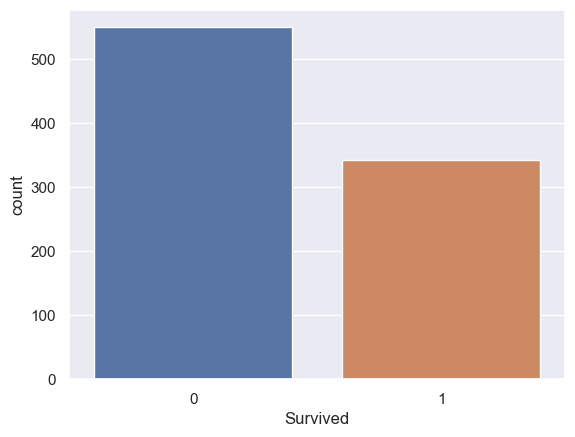

In [9]:
#making a count plot for survived column
sns.countplot(x='Survived',data=df)

In [10]:
#finding the number of pepole sex column
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

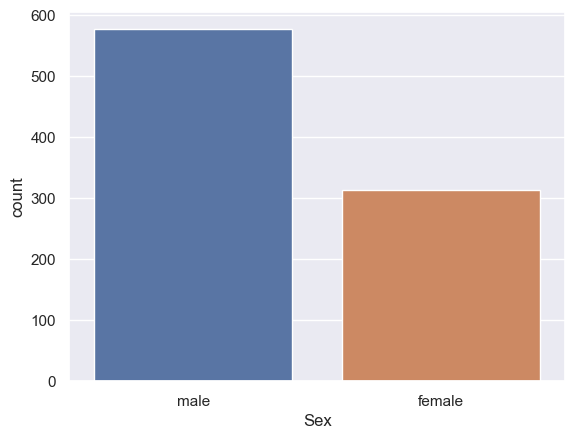

In [11]:
sns.countplot(x='Sex',data=df)

<Axes: xlabel='Survived', ylabel='count'>

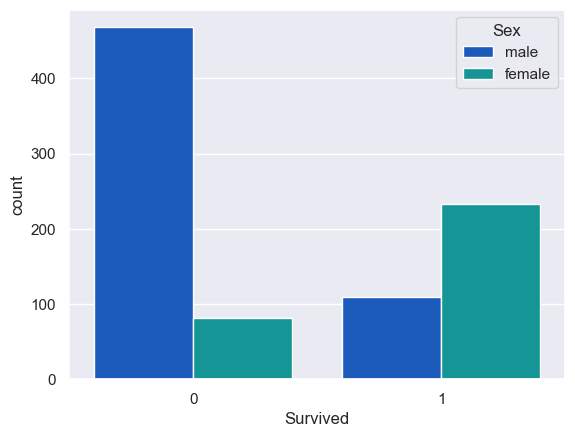

In [12]:
#compare number of survives based on gender
sns.countplot(x='Survived',hue='Sex',data=df,palette='winter')

<Axes: xlabel='Pclass', ylabel='count'>

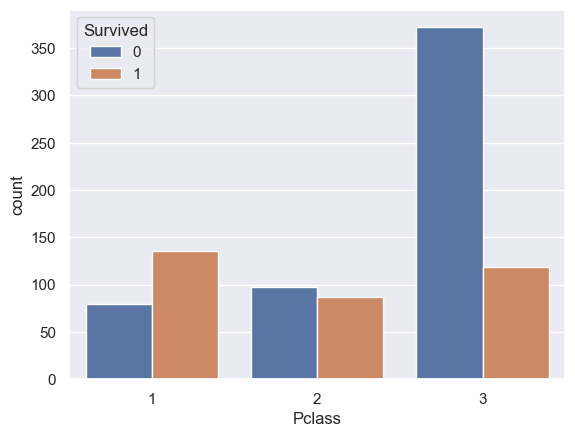

In [13]:
sns.countplot(x='Pclass',hue='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

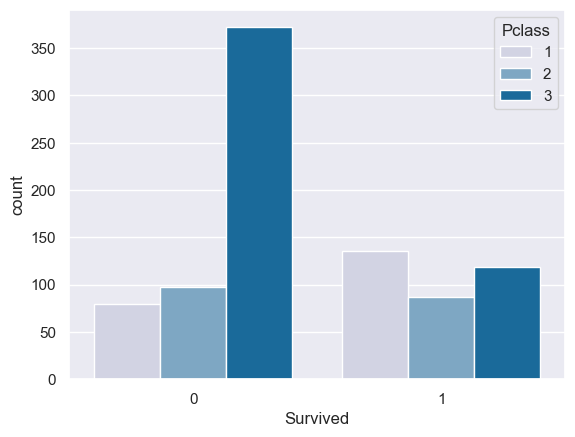

In [14]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='PuBu')

<Axes: ylabel='Frequency'>

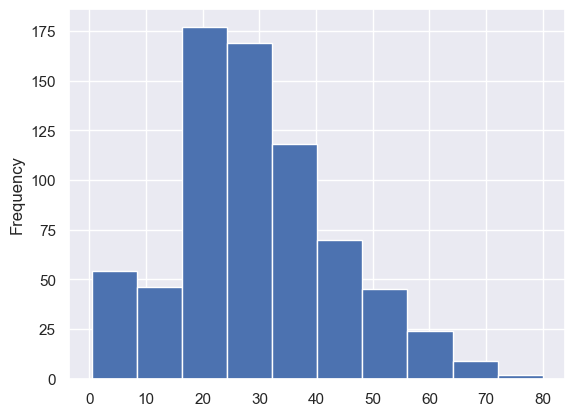

In [15]:
df['Age'].plot.hist()

<Axes: ylabel='Frequency'>

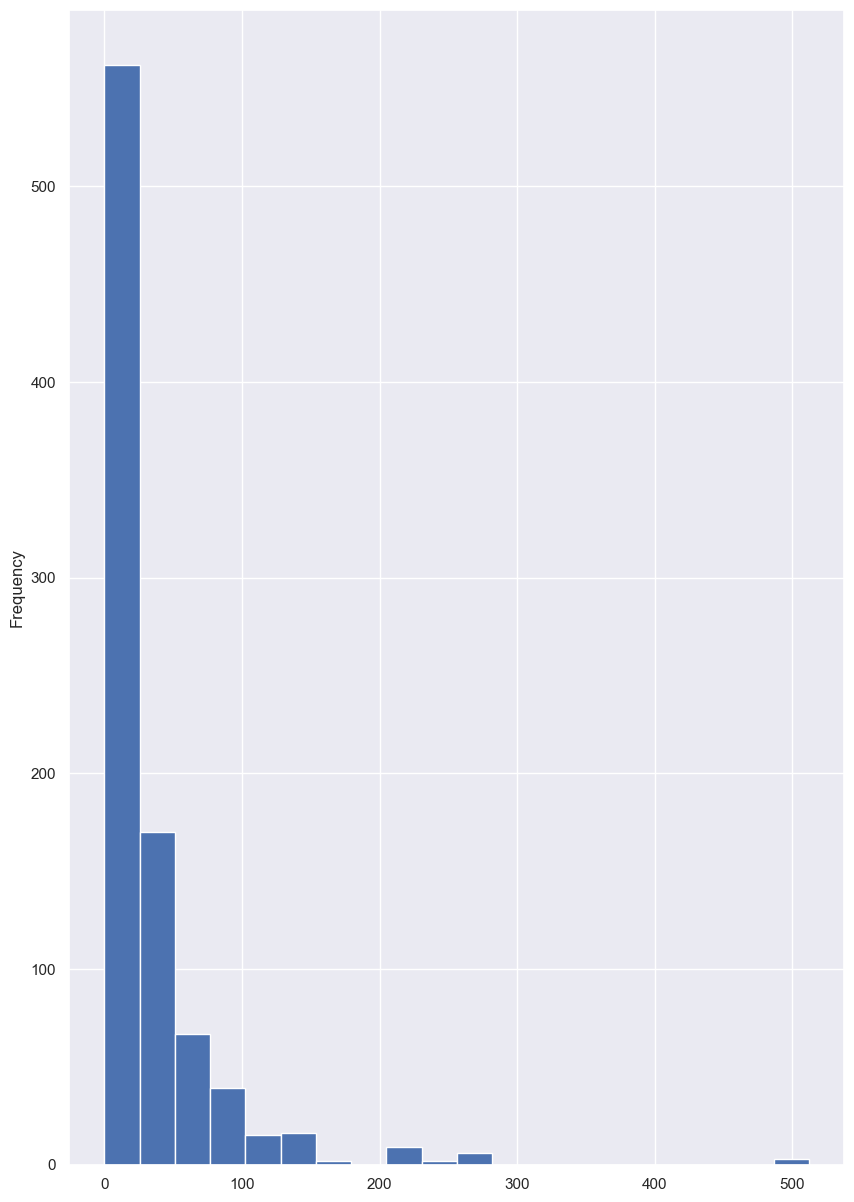

In [16]:
df['Fare'].plot.hist(bins=20,figsize=(10,15))#figsize(width,height) by default figure size is (6.4,4.8)

<Axes: xlabel='SibSp', ylabel='count'>

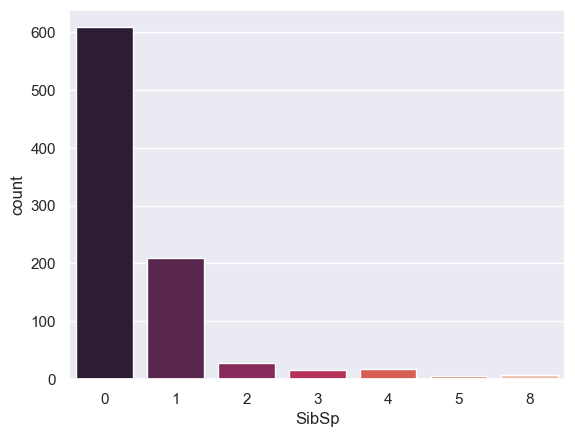

In [17]:
sns.countplot(x='SibSp',data=df,palette='rocket')

<Axes: ylabel='Frequency'>

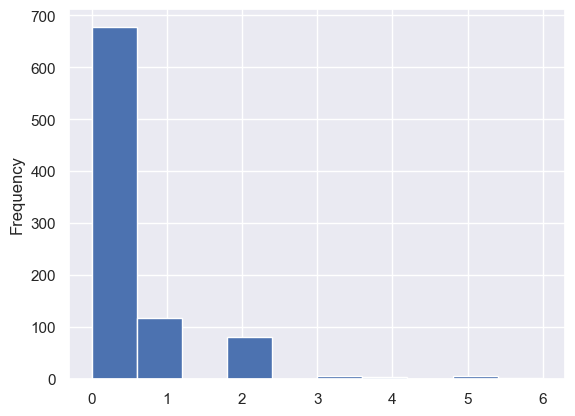

In [18]:
df['Parch'].plot.hist()

<Axes: xlabel='Parch', ylabel='count'>

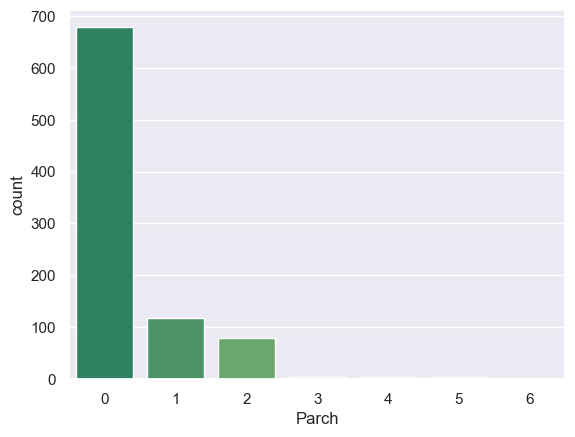

In [19]:
sns.countplot(x='Parch',data=df,palette='summer')

# Data Preprocessing

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

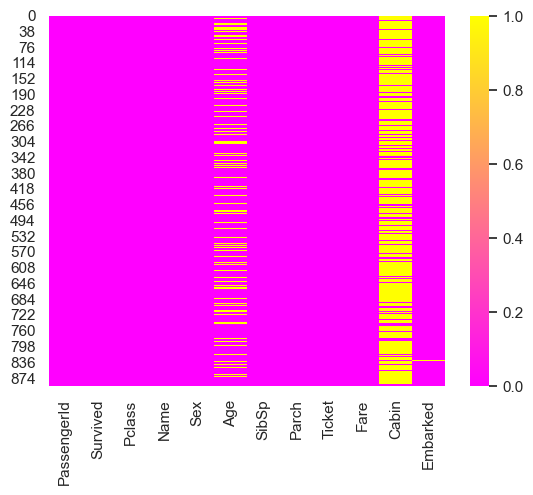

In [21]:
sns.heatmap(df.isnull(),cmap='spring')

<Axes: xlabel='Pclass', ylabel='Age'>

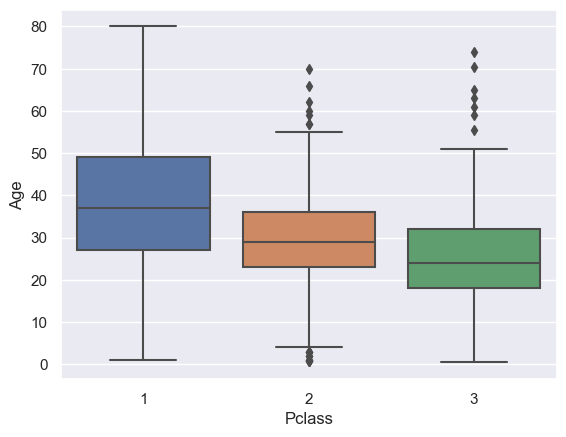

In [22]:
sns.boxplot(x='Pclass',y='Age',data=df)#box plot show the distrubution  with respect to catgory
#dotted line represent the outlier values they are realy present in dataset

In [23]:
#drop the cabin column from the dataframe
df=df.drop(columns='Cabin',axis=1)

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [25]:
#replacing missing values in Age column with mean value
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [26]:
#finding the mode value of embraked column
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [27]:
print(df['Embarked'].mode()[0])

S


In [28]:
#replacing missing value in embraked column with mode value
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [29]:
#check the number of missing value
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

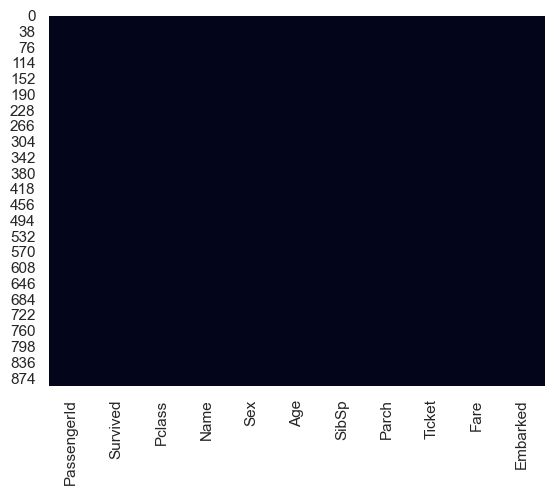

In [30]:
sns.heatmap(df.isnull(),cbar=False)

In [31]:
#finding the number of pepole survived and not survived
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# encoding the categorical column

In [32]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [33]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
#converting categorical columns
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [36]:
x=df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=df['Survived']

In [37]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [38]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [39]:
#spliting the dat intto training and testdata
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=2)
#80% xtrain,20% of data xtest

In [40]:
print(x.shape,X_train.shape,X_test.shape)

(891, 7) (596, 7) (295, 7)


# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [42]:
#model training
#logistic regression
#training the logistic regression model with training data

model.fit(X_train,Y_train)

C:\Users\Huligesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
#model evalution
#Accuracy score
#accuracy on training data

X_train_prediction=model.predict(X_train)

In [44]:
print(X_train_prediction)

[0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0
 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0
 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 1 0 0 0 1 

In [45]:
traning_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print("accuracy scaore of training data",traning_data_accuracy)

accuracy scaore of training data 0.8120805369127517


In [46]:
#accuracy on test data
X_test_prediction=model.predict(X_test)

In [47]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1]


In [48]:
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print("accuracy scaore of testing data",test_data_accuracy)

accuracy scaore of testing data 0.7830508474576271


# Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
predict = model.predict(X_test)

In [51]:
confusion_matrix(Y_test,predict)

array([[154,  21],
       [ 43,  77]], dtype=int64)

In [52]:
pd.DataFrame(confusion_matrix(Y_test,predict),columns=['Predicted NO','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted NO,Predicted Yes
Actual No,154,21
Actual Yes,43,77


so, here is the prediction of my trained model which predicts
154 people were not actually survived and 77  people were actually survived

# Classification

In [53]:
#build classification model
from sklearn.neighbors import KNeighborsClassifier
KNC=KNeighborsClassifier(n_neighbors=5,p=2)
#default distance is measured is eculidean
KNC.fit(X_train,Y_train)

KNeighborsClassifier()

In [54]:
#now test on test data
Y_pred=KNC.predict(X_test)
Y_pred#predicted result

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [55]:
Y_test#actual result

707    1
37     0
615    1
169    0
68     1
      ..
880    1
58     1
363    0
16     0
310    1
Name: Survived, Length: 295, dtype: int64

In [56]:
Y_test.value_counts()

0    175
1    120
Name: Survived, dtype: int64

In [57]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
707,1,0,42.0,0,0,26.2875,0
37,3,0,21.0,0,0,8.0500,0
615,2,1,24.0,1,2,65.0000,0
169,3,0,28.0,0,0,56.4958,0
68,3,1,17.0,4,2,7.9250,0
...,...,...,...,...,...,...,...
880,2,1,25.0,0,1,26.0000,0
58,2,1,5.0,1,2,27.7500,0
363,3,0,35.0,0,0,7.0500,0
16,3,0,2.0,4,1,29.1250,2


In [58]:
#confusion matrix
#it measures the confusion in the classes of the trained model
#it basically tells the model how many wrong and how many correct predicted are
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(Y_pred,Y_test)
CM


array([[139,  58],
       [ 36,  62]], dtype=int64)

In [59]:
Accuracy=np.sum(CM[0,0]+CM[1,1])/np.sum(CM)
print('accuracy=',Accuracy*100)

accuracy= 68.13559322033899


In [60]:
#how to choose best value of the k
#try different set of k values to do the prediction
#k values having higher accuracy is the best value

In [61]:
ACC=[]
K=[]
for k in range(2,11):
    KNC=KNeighborsClassifier(n_neighbors=k,p=2)
    KNC.fit(X_train,Y_train)
    Y_pred=KNC.predict(X_test)
    CM=confusion_matrix(Y_pred,Y_test)
    Accuracy=np.sum(CM[0,0]+CM[1,1])/np.sum(CM)
    ACC.append(Accuracy*100)
    K.append(k)

print(K)
print(ACC)
M=max(ACC)
k_best=ACC.index(M)+2
print('accuracy best=',M)
print('best value of k=',k_best)

[2, 3, 4, 5, 6, 7, 8, 9, 10]
[67.11864406779661, 68.8135593220339, 68.47457627118644, 68.13559322033899, 69.49152542372882, 69.15254237288136, 69.83050847457626, 70.16949152542374, 70.16949152542374]
accuracy best= 70.16949152542374
best value of k= 9


In [62]:
#build classification model
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(criterion='entropy',random_state=0)#

DTC.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [63]:
#now test on test data
Y_pred=DTC.predict(X_test)
Y_pred#predicted result

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [64]:
Y_test

707    1
37     0
615    1
169    0
68     1
      ..
880    1
58     1
363    0
16     0
310    1
Name: Survived, Length: 295, dtype: int64

In [65]:
Y_test.value_counts()

0    175
1    120
Name: Survived, dtype: int64

In [66]:

X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
707,1,0,42.0,0,0,26.2875,0
37,3,0,21.0,0,0,8.0500,0
615,2,1,24.0,1,2,65.0000,0
169,3,0,28.0,0,0,56.4958,0
68,3,1,17.0,4,2,7.9250,0
...,...,...,...,...,...,...,...
880,2,1,25.0,0,1,26.0000,0
58,2,1,5.0,1,2,27.7500,0
363,3,0,35.0,0,0,7.0500,0
16,3,0,2.0,4,1,29.1250,2


In [67]:
Accuracy=np.sum(CM[0,0]+CM[1,1])/np.sum(CM)
print('accuracy=',Accuracy*100)

accuracy= 70.16949152542374


In [68]:
ACC=[]
K=[]
for k in range(2,11):
    DTC=DecisionTreeClassifier(criterion='entropy',random_state=0)
    DTC.fit(X_train,Y_train)
    Y_pred=DTC.predict(X_test)
    CM=confusion_matrix(Y_pred,Y_test)
    Accuracy=np.sum(CM[0,0]+CM[1,1])/np.sum(CM)
    ACC.append(Accuracy*100)
    K.append(k)

print(K)
print(ACC)
M=max(ACC)
k_best=ACC.index(M)+2
print('accuracy best=',M)
print('best value of k=',k_best)

[2, 3, 4, 5, 6, 7, 8, 9, 10]
[80.33898305084746, 80.33898305084746, 80.33898305084746, 80.33898305084746, 80.33898305084746, 80.33898305084746, 80.33898305084746, 80.33898305084746, 80.33898305084746]
accuracy best= 80.33898305084746
best value of k= 2


[Text(0.4966299019607843, 0.9722222222222222, 'x[1] <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]'),
 Text(0.18045343137254902, 0.9166666666666666, 'x[2] <= 13.0\nentropy = 0.663\nsamples = 383\nvalue = [317, 66]'),
 Text(0.04411764705882353, 0.8611111111111112, 'x[3] <= 2.0\nentropy = 0.961\nsamples = 26\nvalue = [10, 16]'),
 Text(0.03431372549019608, 0.8055555555555556, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.05392156862745098, 0.8055555555555556, 'x[2] <= 3.5\nentropy = 0.439\nsamples = 11\nvalue = [10, 1]'),
 Text(0.04411764705882353, 0.75, 'x[4] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.03431372549019608, 0.6944444444444444, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05392156862745098, 0.6944444444444444, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.06372549019607843, 0.75, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.3167892156862745, 0.8611111111111112, 'x[0] <= 1.5\nentropy = 0.584\nsamples = 357\

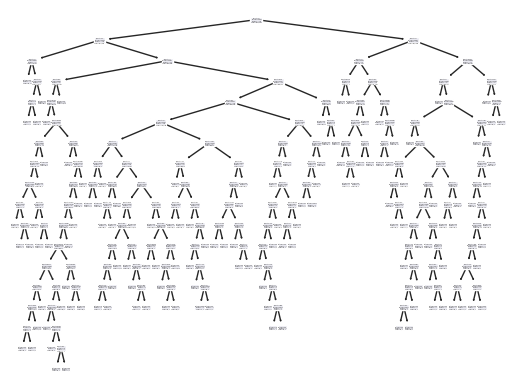

In [69]:
from sklearn import tree
tree.plot_tree(DTC)

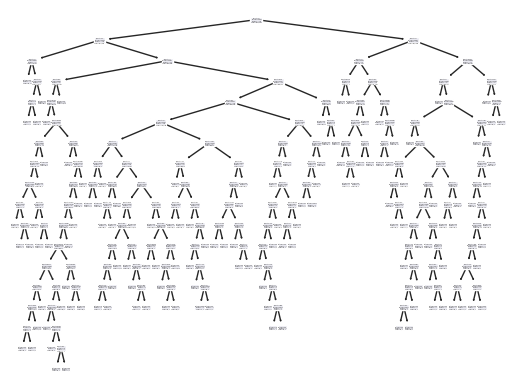

In [70]:
from sklearn import tree
tree.plot_tree(DTC)
plt.show()

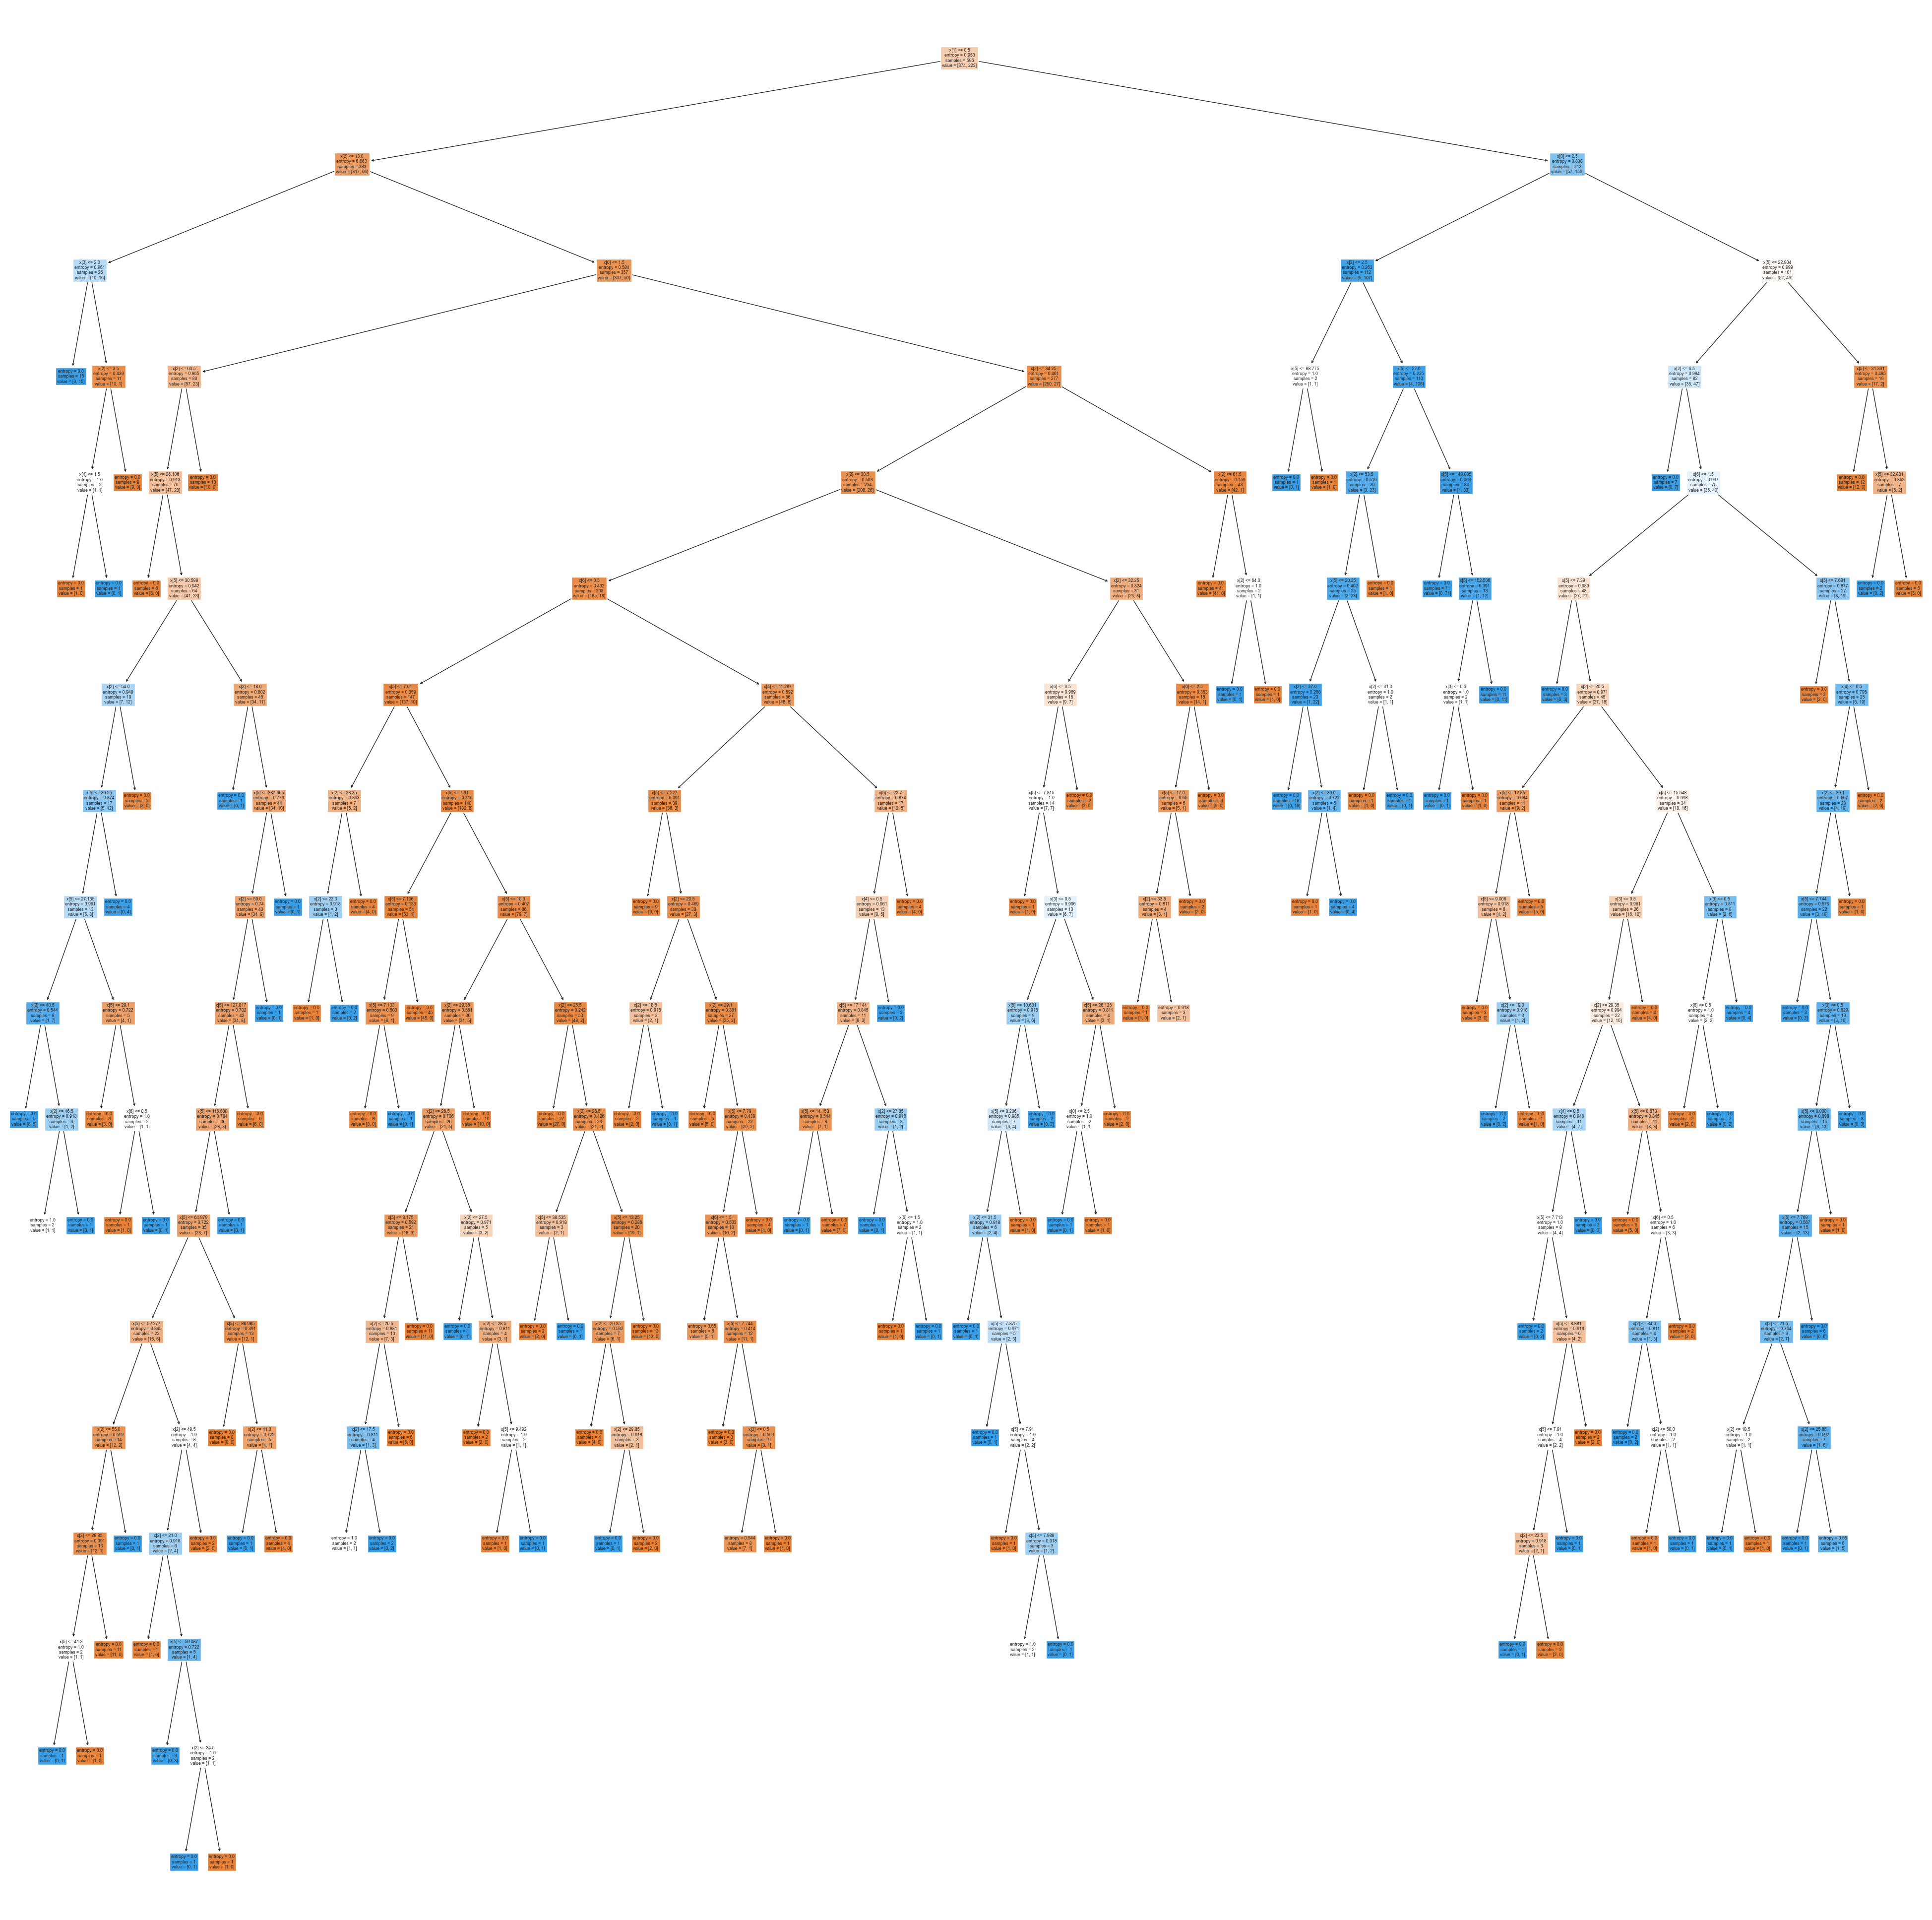

In [71]:
from sklearn import tree
fig=plt.figure(figsize=(50,50))
_=tree.plot_tree(DTC,filled=True)
plt.show()